Gaussian fit and parameter handling
===================================

In [1]:
from __future__ import print_function, division
# Import numpy and matplotlib
from numpy import arange, sqrt, exp, pi, random, ones_like
import matplotlib.pylab as plt
import scipy.optimize as sco
# ... and now the funcFit2 package
from PyAstronomy import funcFit2 as fuf2

# For reproducability
random.seed(1234)

# Create some mock data
# Choose parameters...
gPar = {"A":-5.0, "sig":10.0, "mu":10.0, "off":1.0, "lin":0.0}
# ...and calculate profile...
x = arange(100) - 50.0
y = gPar["off"] + gPar["A"] / sqrt(2*pi*gPar["sig"]**2) \
    * exp(-(x-gPar["mu"])**2/(2*gPar["sig"]**2))
# ...add some noise...
y += random.normal(0.0, 0.01, x.size)
# ...and save the error bars
yerr = ones_like(x)*0.01

plt.errorbar(x, y, yerr=yerr, fmt='b+')
plt.show()

<Figure size 640x480 with 1 Axes>

Fitting and parameter management
---------------------------------------------------------------

List of available parameters:  ['A', 'mu', 'sig', 'off', 'lin']


Parameters and guess values: 
  A   :  -10.0
  sig :  15.77
  off :  0.96
  mu  :  7.5

------------------- Parameter summary --------------------
      A =          -10, free: F, restricted: F, related: F
     mu =          7.5, free: F, restricted: F, related: F
    sig =        15.77, free: F, restricted: F, related: F
    off =         0.96, free: F, restricted: F, related: F
    lin =            0, free: F, restricted: F, related: F
----------------------------------------------------------

Parameter name/value dictionary:  OrderedDict([('A', -10.0), ('mu', 7.5), ('sig', 15.77), ('off', 0.96), ('lin', 0.0)])
Names and values of FREE parameters:  {'A': -10.0, 'mu': 7.5, 'sig': 15.77, 'off': 0.96}
Names and values of FROZEN parameters:  {'lin': 0.0}

Optimization terminated successfully.
         Current function value: 98.642163
         Iterations: 154
         Function evaluations: 261

Fit results:  (array([-5.02

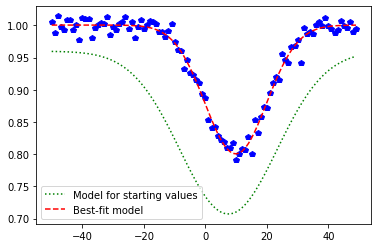

In [2]:
# Create a fitting object representing a Gaussian and set guess parameters.
gf = fuf2.GaussFit()
# See what parameters are available
print("List of available parameters: ", gf.availableParameters())
print()

# Set guess values for the parameters
gf["A"] = -10.0
gf["sig"] = 15.77
gf["off"] = 0.96
gf["mu"] = 7.5
print()

# Let us see whether the assignment worked
print("Parameters and guess values: ")
print("  A   : ", gf["A"])
print("  sig : ", gf["sig"])
print("  off : ", gf["off"])
print("  mu  : ", gf["mu"])
print()

# More convenient overview of parameter status
gf.parameterSummary()
print()

# Exporting and assigning parameter values via dictionary
ps = gf.parameters()
print("Parameter name/value dictionary: ", ps)
# Assigning values from dictionary (identical values here)
gf.assignValues(ps)


# Evaluate the model for the starting values
startmodel = gf.evaluate(x)

# Which parameters shall be varied during the fit?
# 'Thaw' those (the order is irrelevant)
gf.thaw(["A", "sig", "off", "mu"])

# Show values and names of free/frozen parameters (i.e., parameters not varied in a fit)
print("Names and values of FREE parameters: ", gf.freeParameters())
print("Names and values of FROZEN parameters: ", gf.frozenParameters())
print()

# Use scipy's fmin to minimize chi square 
fr = sco.fmin(gf.chisqr, gf.freeParamVals(), args=(x,y,yerr), full_output=True)
print()
print("Fit results: ", fr)
# Set the parameter values to best-fit values
gf.setFreeParamVals(fr[0])


# Use a convenience function to carry out optimization
# using scipy's fmin algorithm (parameter values are set to
# best-fit result)
fr = fuf2.fitfmin(gf, gf.chisqr, x, y, yerr=yerr)

# Get a summary of current parameters from the model
gf.parameterSummary()

# Let us see what we have done...
bestfitmodel = gf.evaluate(x)

plt.plot(x, y, 'bp')
plt.plot(x, startmodel, 'g:', label="Model for starting values")
plt.plot(x, bestfitmodel, 'r--', label="Best-fit model")
plt.legend()
plt.show()